#### <font color=blue> *Variance decomposition of GMSL change in 2100 under SSP1-2.6 (left column) and SSP5-8.5 (right column), under Workflows 1f, 2f, 3f and 4.* </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import date
import os
#
colrs = 'rcgmbyrkcbgm'

<h1 style="font-size: 32pt; color: blue; font-family: 'Times New Roman';">
    Load the file paths:
    <p style="font-size: 16pt; color: red; font-family: 'Times New Roman';"> 
        Use:: NZ run global data 
    </p>
</h1>

In [2]:
exp_date=221217
ssp='coupling.ssp585'
path_exp=f'/projects/kopp/facts-experiments/{exp_date}/{ssp}/output/'
# ___
workflows = {
    'wf1f':     ['ar5AIS.ipccar5.icesheets_AIS_globalsl.nc', 'GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc'],
    'wf2f':     ['larmip.larmip.AIS_globalsl.nc', 'GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc'],
    'wf3f':     ['deconto21.deconto21.AIS_AIS_globalsl.nc', 'GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc'],
    'wf4' :     ['bamber19.bamber19.icesheets_AIS_globalsl.nc', 'bamber19.bamber19.icesheets_GIS_globalsl.nc'],
    'common':   ['ar5glaciers.ipccar5.glaciers_globalsl.nc', 'lws.ssp.landwaterstorage_globalsl.nc', 'ocean.tlm.sterodynamics_globalsl.nc']
}

In [3]:
# Get file paths of files in Individual workflow.
WORKFLOW='wf1f'
file_path_wf1f = [path_exp + ssp + '.'+ file for file in workflows[WORKFLOW] + workflows['common']]
#
# file_path_output = "\n".join(file_path_wf1f)
# print(file_path_output)

<h1 style="font-size: 24pt; color: blue; font-family: 'Times New Roman';">
    Compute::
    <span style="font-size: 16pt; color: red; font-family: 'Times New Roman';"> 
        Fraction of Variance
    </span>
</h1>

In [4]:
year_start = 2020; year_end = 2100; 
loc=0 #for globbal
#
a=[]; components=[]
# Open files in specific workflow.
for fp in file_path_wf1f:
    data_nc = xr.open_dataset(fp)
    # Index for time.
    time = data_nc["years"].values
    idx_year_start, idx_year_end = np.where((time == year_start) | (time == year_end))[0]

    # Save data into a new variable.
    components.append(os.path.basename(fp).split('.')[2])
    b = data_nc.sea_level_change[:,idx_year_start:idx_year_end+1,loc].values
    a.append(b[None,:] )
    #stack all at once
    sampsloccomponents = np.vstack(a);  
    sampsloccomponents = np.transpose(sampsloccomponents,(1,0,2))
    years=time[idx_year_start:idx_year_end+1]

In [5]:
varV = []; varF = [];  valIND = 0
denom=np.var(np.sum(sampsloccomponents[:,:,:],axis = 1),axis=0)
for co in components:
    # u = np.sum(sampsloccomponents[:,0:valIND+1,:],axis = 1)
    u = sampsloccomponents[:,valIND,:]
    VAR_V=(np.var(u,axis=0))/1e6
    VAR_F=(np.var(u,axis=0))/denom
    varV.append(VAR_V)
    varF.append(VAR_F)
    valIND += 1    

<h1 style="font-size: 24pt; color: blue; font-family: 'Times New Roman';">
    PLOT:: 
    <span style="font-size: 16pt; color: red; font-family: 'Times New Roman';"> 
        Fraction of Variance
    </span>
</h1>

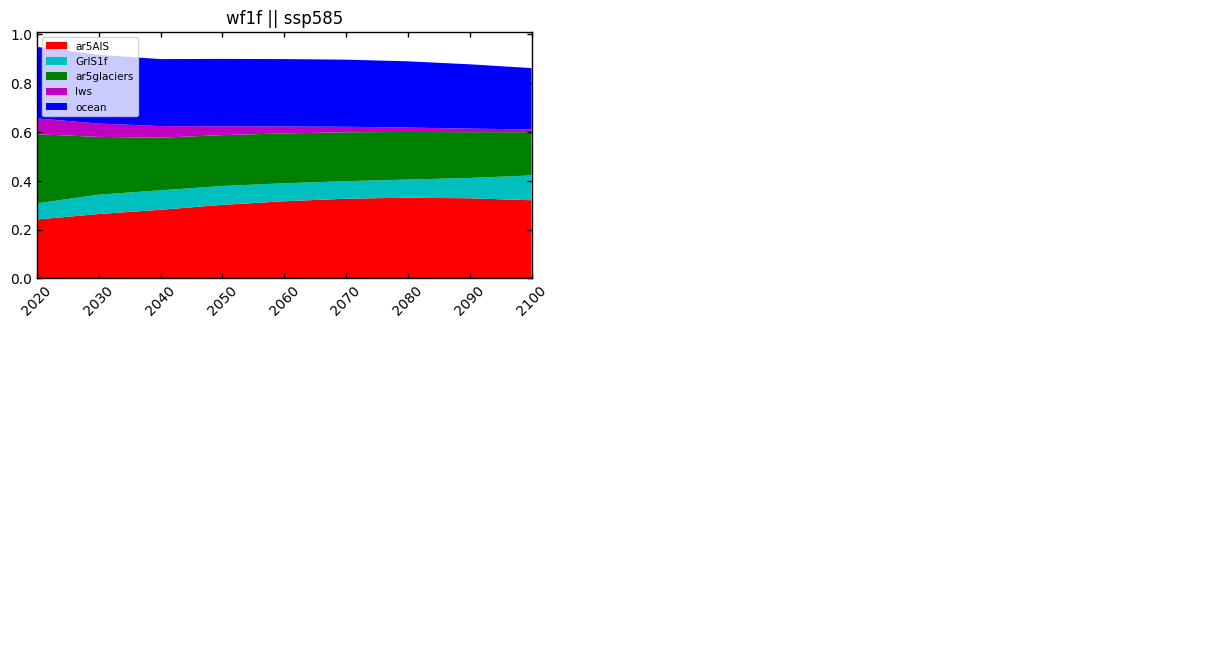

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8)); plt.subplots_adjust(wspace=0.35, hspace=0.5)
#
font=10;tick_len=3.5;  tick_wid=1
axes[0,1].axis('off'); axes[1,0].axis('off'); axes[1, 1].axis('off');
#
# fn.showFIG(axes[0,0],file[0],stnIDX,region,ssp,options)
ax = axes[0,0]; 
#
ax.stackplot(years,varF[0],varF[1], varF[2], varF[3], varF[4], labels=components, colors=colrs);
#
ax.legend(loc='upper left', fontsize=font-(0.25*font))
ax.tick_params(direction='in', length=tick_len, width=tick_wid, axis='both', top=True, right=True)
for axis in ['top', 'bottom', 'left', 'right']: ax.spines[axis].set_linewidth(1)
#
x_min=year_start; x_max=year_end; x_int=10;
ax.set_xlim(x_min, x_max);  
x_ticks= np.arange(x_min, x_max+0.1, x_int).astype(int)
ax.set_xticks(x_ticks);
ax.set_xticklabels(x_ticks,fontsize=font, rotation=45);
#
y_min=0; y_max=1.01; y_int=0.2; decimal=1;
ax.set_ylim(y_min, y_max);
if decimal is not None: y_ticks = np.around(np.arange(y_min, y_max, y_int), decimals=decimal);
else: y_ticks = np.arange(y_min, y_max, y_int);
ax.set_yticks(y_ticks);
ax.set_yticklabels(y_ticks, fontsize=font, rotation=0);
#
scenario=ssp.split('.')[1]
ax.set_title(f'{WORKFLOW} || {scenario}');

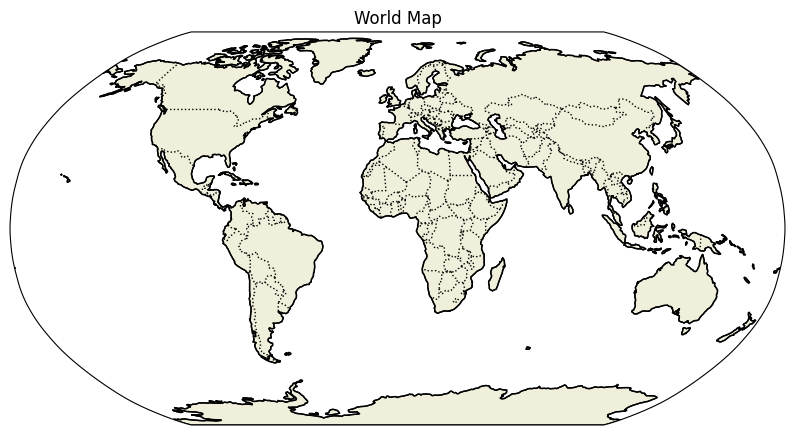

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#
# fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Robinson()})
#
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
# ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor=cfeature.COLORS['water'])
# ax.add_feature(cfeature.RIVERS)
#
ax.set_title("World Map")
#
plt.show()

In [8]:
# import matplotlib
# matplotlib.use('Agg')
#
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.Robinson()})
#
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
#
ax.set_title("World Map in Robinson Projection with Pie Chart over NYC")

# lat/lon for NYC
lat, lon = 40.7128, -74.0060
x, y = ax.transData.transform_point((lon, lat)) # Convert 2 ax coordinates
#
# Define data for the pie chart
sizes = [215, 130, 245, 210]
labels = ['A', 'B', 'C', 'D']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Create a new axes at the specified location and plot the pie chart
ax_sub = fig.add_axes([x, y, 0.1, 0.1], frame_on=False)
ax_sub.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax_sub.axis('equal')  # Equal aspect ratio ensures the pie is circular.

# Display the map
# plt.draw()
plt.show()


ValueError: Image size of 82411804x45300541 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x1200 with 2 Axes>

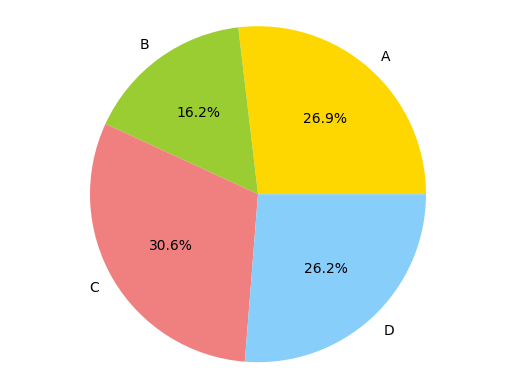

In [9]:
# Define data for the pie chart
sizes = [215, 130, 245, 210]
labels = ['A', 'B', 'C', 'D']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Create a pie chart
fig, ax_sub = plt.subplots()
ax_sub.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax_sub.axis('equal')  # Equal aspect ratio ensures the pie is circular.

plt.show()